1. Thư viện

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
import graphviz
import os

os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

plt.style.use("ggplot")

df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


2. Discretize các biến liên tục

In [20]:
# Sao lưu dữ liệu gốc
df_display = df.copy()

# 1) Age
df_display["age"] = pd.cut(
    df_display["age"],
    bins=[29, 45, 55, 65, 80],
    labels=["<45", "45–55", "55–65", ">65"],
    include_lowest=True
)

# 2) Resting blood pressure
df_display["trestbps"] = pd.cut(
    df_display["trestbps"],
    bins=[90, 120, 130, 150, 210],
    labels=["<120", "120–130", "130–150", ">150"],
    include_lowest=True
)

# 3) Cholesterol
df_display["chol"] = pd.cut(
    df_display["chol"],
    bins=[120, 200, 240, 600],
    labels=["<200", "200–240", ">240"],
    include_lowest=True
)

# 4) Thalach
df_display["thalach"] = pd.cut(
    df_display["thalach"],
    bins=[70, 120, 145, 170, 210],
    labels=["<120", "120–145", "145–170", ">170"],
    include_lowest=True
)

# 5) Oldpeak
df_display["oldpeak"] = pd.cut(
    df_display["oldpeak"],
    bins=[-0.1, 1.0, 2.0, 7.0],
    labels=["<1.0", "1.0–2.0", ">2.0"],
    include_lowest=True
)


3.Nhãn chữ + tạo bản heart.csv (đã rời rạc)

In [35]:
# Tạo bản dùng cho model
df_model = df_display.copy()

age_map = {
    "<45": 0,
    "45–55": 1,
    "55–65": 2,
    ">65": 3
}

trestbps_map = {
    "<120": 0,
    "120–130": 1,
    "130–150": 2,
    ">150": 3
}

chol_map = {
    "<200": 0,
    "200–240": 1,
    ">240": 2
}

thalach_map = {
    "<120": 0,
    "120–145": 1,
    "145–170": 2,
    ">170": 3
}

oldpeak_map = {
    "<1.0": 0,
    "1.0–2.0": 1,
    ">2.0": 2
}

df_model["age"] = df_model["age"].map(age_map)
df_model["trestbps"] = df_model["trestbps"].map(trestbps_map)
df_model["chol"] = df_model["chol"].map(chol_map)
df_model["thalach"] = df_model["thalach"].map(thalach_map)
df_model["oldpeak"] = df_model["oldpeak"].map(oldpeak_map)
df_model.head()

# df_display.to_csv(
#     r"A:\Kho dữ liệu và khai phá dữ liệu\Final\heart_discretized_display.csv",
#     index=False,
#     encoding="utf-8-sig"
# )


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,0,1,1,0,1,2,0,0,2,2,3,0
1,1,1,0,2,1,1,0,2,1,2,0,0,3,0
2,3,1,0,2,0,0,1,1,1,2,0,0,3,0
3,2,1,0,2,1,0,1,2,0,0,2,1,3,0
4,2,0,0,2,2,1,1,0,0,1,1,3,2,0


4. Feature (test)

In [ ]:
features = [
    # Các thuộc tính discretized
    "age",
    "trestbps",
    "chol",
    "thalach",
    "oldpeak",
    
    # Các thuộc tính gốc
    "sex",
    "cp",
    "fbs",
    "restecg",
    "exang",
    "slope",
    "ca",
    "thal"
]

X = df[features]
y = df["target"]

X.head()


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
0,52,125,212,168,1.0,1,0,0,1,0,2,2,3
1,53,140,203,155,3.1,1,0,1,0,1,0,0,3
2,70,145,174,125,2.6,1,0,0,1,1,0,0,3
3,61,148,203,161,0.0,1,0,0,1,0,2,1,3
4,62,138,294,106,1.9,0,0,1,1,0,1,3,2


5. Train/Test (7/3)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 717
Test size: 308


6. Làm sạch

In [38]:
df.isnull().sum()
df.drop(columns=[col for col in df.columns if "_group" in col]).info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


7. Train Decision Tree

In [ ]:
model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    ccp_alpha=0.0001,
    random_state=42
)
model.fit(X_train, y_train)
print("MODEL TRAINED SUCCESSFULLY")


MODEL TRAINED SUCCESSFULLY


8. Evaluation

In [40]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nMODEL EVALUATION")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_prob))



MODEL EVALUATION
Accuracy: 0.8571428571428571
Precision: 0.8475609756097561
Recall: 0.879746835443038
F1-score: 0.8633540372670807

Confusion Matrix:
 [[125  25]
 [ 19 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.85      0.88      0.86       158

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308

ROC AUC: 0.9108016877637131


9. Ma trận nhầm lẫn

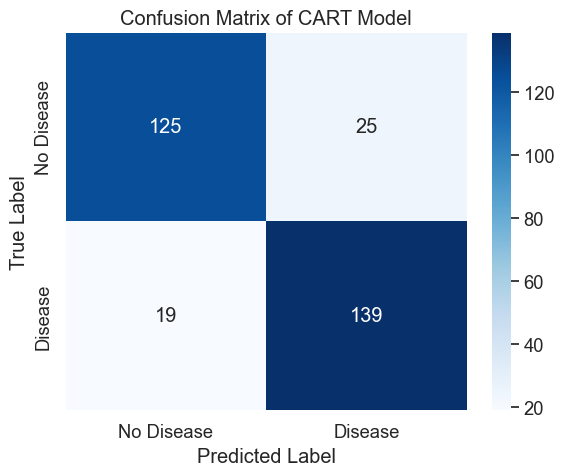

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of CART Model")
plt.tight_layout()
plt.show()


10. Vẽ cây

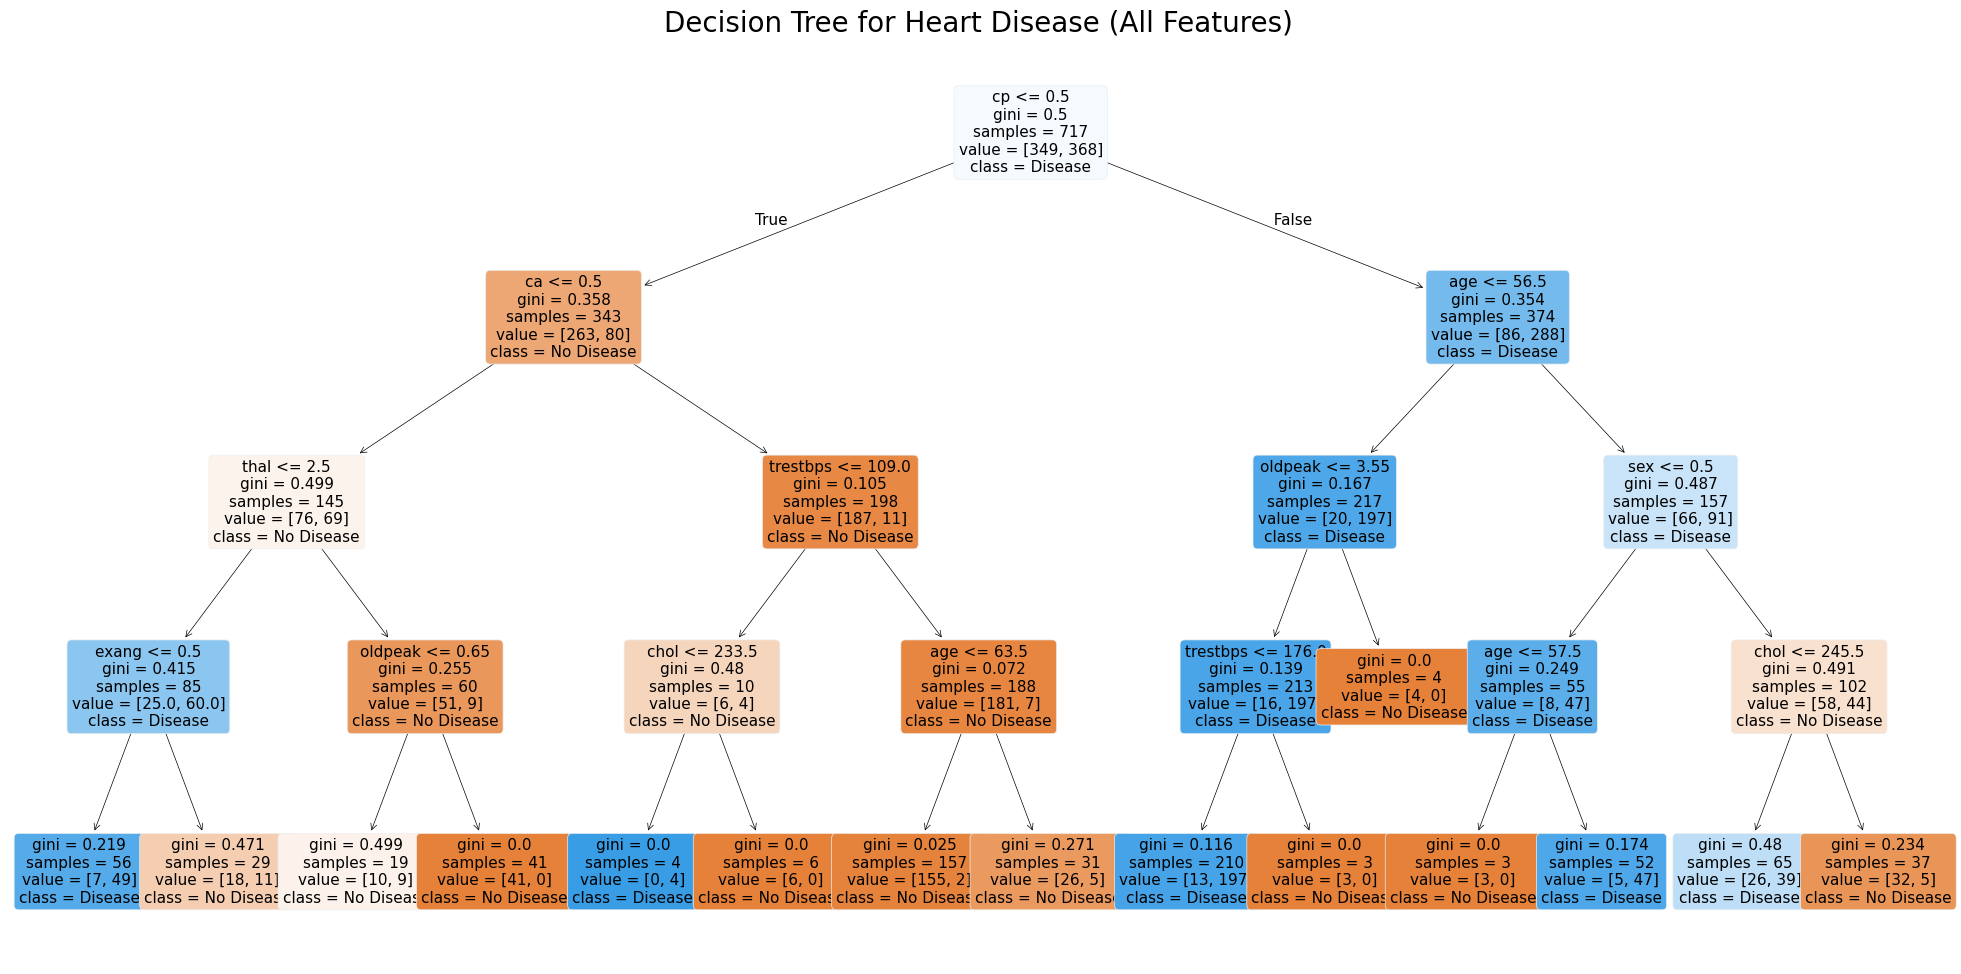

In [29]:
plt.figure(figsize=(25, 12))
plot_tree(
    model,
    feature_names=features,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    fontsize=11
)
plt.title("Decision Tree for Heart Disease (All Features)", fontsize=20)
plt.show()

10. Ảnh cây (với feature test hiện tại)

In [42]:
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=features,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("heart_tree_full_features", format="png", cleanup=True)

"Saved heart_tree_full_features.png"

'Saved heart_tree_full_features.png'

11. ROC Curve

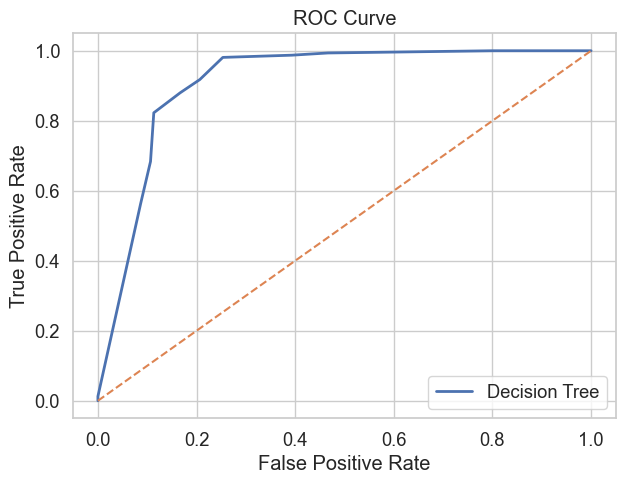

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, linewidth=2, label="Decision Tree")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid(True)
plt.legend()
plt.show()

12. Feature Importance

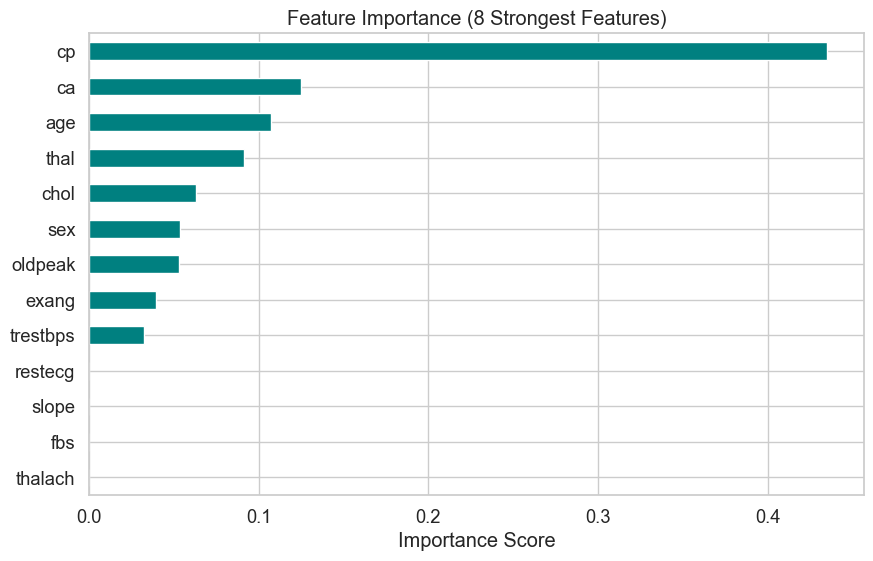

thalach     0.000000
fbs         0.000000
slope       0.000000
restecg     0.000000
trestbps    0.032475
exang       0.039573
oldpeak     0.052869
sex         0.053940
chol        0.063183
thal        0.091618
age         0.107071
ca          0.124648
cp          0.434623
dtype: float64

In [45]:
importance = pd.Series(model.feature_importances_, index=features)
importance = importance.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
importance.plot(kind="barh", color="teal")
plt.title("Feature Importance (8 Strongest Features)")
plt.xlabel("Importance Score")
plt.show()

importance

13.

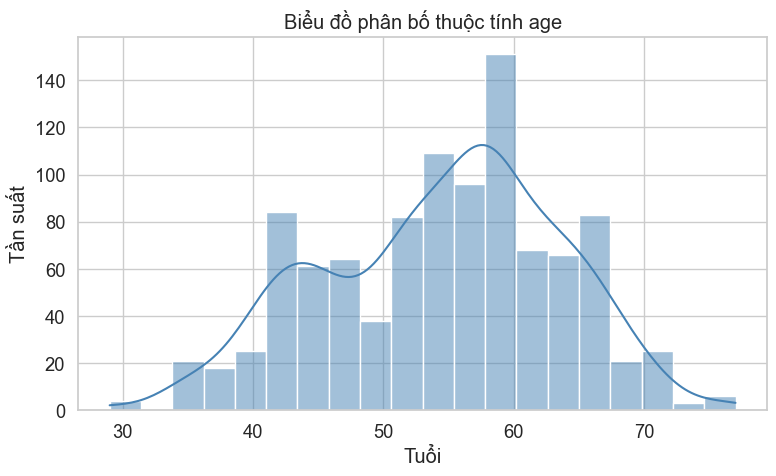

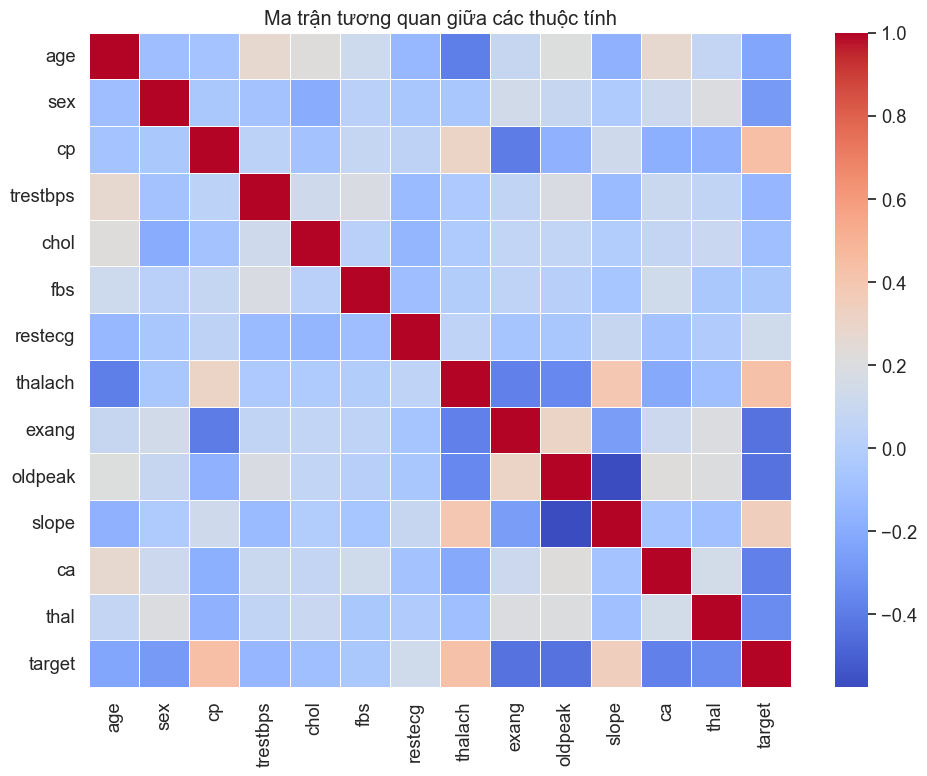

In [46]:

# Đọc dữ liệu
df = pd.read_csv("heart.csv")

# Style
sns.set(style="whitegrid", font_scale=1.2)

# ===========================
# 1. Histogram phân bố tuổi
# ===========================
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True, color="steelblue")
plt.title("Biểu đồ phân bố thuộc tính age")
plt.xlabel("Tuổi")
plt.ylabel("Tần suất")
plt.tight_layout()
plt.savefig("age_distribution.png", dpi=300)
plt.show()

# ===========================
# 4. Heatmap tương quan
# ===========================
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()


14. Số liệu thống kê dữ liệu của từng thuộc tính (khi đã rời rạc hóa)

In [51]:
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

for col in ["age", "trestbps", "chol", "thalach", "oldpeak"]:
    print(f"\n=== {col.upper()} (DISCRETIZED) ===")

    summary = pd.crosstab(
        df_display[col],
        df_display["target"]
    )

    summary.columns = ["No Disease (0)", "Disease (1)"]
    summary["Total"] = summary.sum(axis=1)

    print(summary)



=== AGE (DISCRETIZED) ===
       No Disease (0)  Disease (1)  Total
age                                      
<45                57          156    213
45–55             121          172    293
55–65             265          143    408
>65                56           55    111

=== TRESTBPS (DISCRETIZED) ===
          No Disease (0)  Disease (1)  Total
trestbps                                    
<120                 138          191    329
120–130              122          129    251
130–150              165          165    330
>150                  74           41    115

=== CHOL (DISCRETIZED) ===
         No Disease (0)  Disease (1)  Total
chol                                       
<200                 73           99    172
200–240             145          205    350
>240                281          222    503

=== THALACH (DISCRETIZED) ===
         No Disease (0)  Disease (1)  Total
thalach                                    
<120                109           21    130
120–145 

In [52]:
cp_summary = pd.crosstab(
    df["cp"],          # cp KHÔNG rời rạc hóa
    df["target"]
)

cp_summary.columns = ["No Disease (0)", "Disease (1)"]
cp_summary["Total"] = cp_summary.sum(axis=1)

print("\n=== CP (Chest Pain Type) ===")
print(cp_summary)



=== CP (Chest Pain Type) ===
    No Disease (0)  Disease (1)  Total
cp                                    
0              375          122    497
1               33          134    167
2               65          219    284
3               26           51     77


In [58]:
def gini_impurity(y):
    probs = y.value_counts(normalize=True)
    return 1 - sum(probs ** 2)


def gini_split(df, feature, target="target"):
    """
    df: DataFrame
    feature: tên thuộc tính (vd: 'cp', 'age')
    """
    total_samples = len(df)
    gini_split_value = 0

    for value, subset in df.groupby(feature):
        weight = len(subset) / total_samples
        gini = gini_impurity(subset[target])
        gini_split_value += weight * gini

    return gini_split_value

print("GiniSplit(cp)  =", gini_split(df_display, "cp"))
print("GiniSplit(age) =", gini_split(df_display, "age"))



GiniSplit(cp)  = 0.3626836574768126
GiniSplit(age) = 0.45542408840062637


C:\Users\thanh\AppData\Local\Temp\ipykernel_31036\4111545590.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for value, subset in df.groupby(feature):
